In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload

%autoreload 2

%matplotlib notebook
sns.set()

In [8]:
import galsim
from mdetsims import Sim

In [45]:
%%time

sim = Sim(
    rng=np.random.RandomState(seed=3327),
    g1=0.02,
    gal_type='ground_galsim_parametric',
    psf_type='ps',
    n_coadd=200,
    psf_kws={'trunc': 1})
mbobs = sim.get_mbobs()

CPU times: user 15.6 s, sys: 253 ms, total: 15.8 s
Wall time: 16.1 s


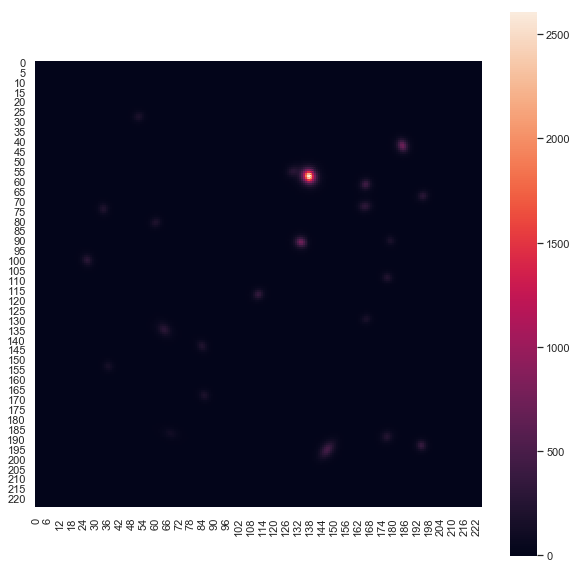

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(mbobs[0][0].image, square=True)

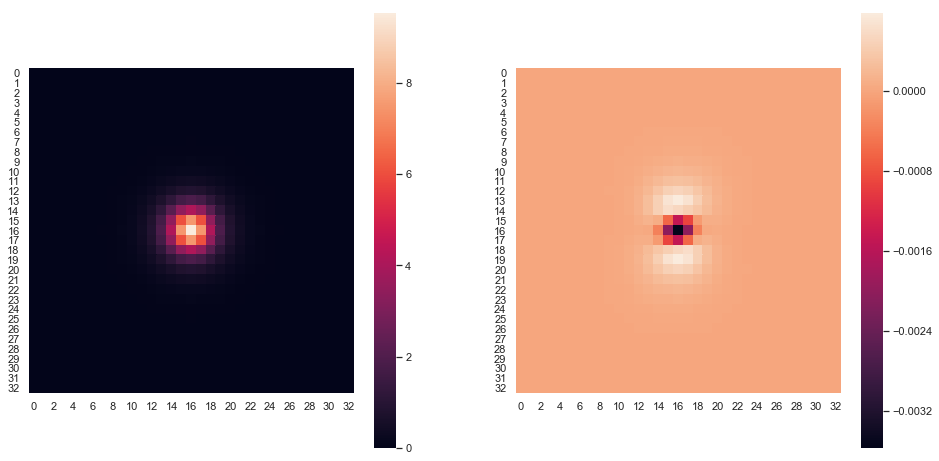

In [47]:
psf_obs1 = sim.get_psf_obs(x=0, y=30)
psf_obs2 = sim.get_psf_obs(x=10, y=120)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.heatmap(psf_obs1.image, square=True, ax=axs[0])

sns.heatmap((psf_obs2.image - psf_obs1.image) / np.max(psf_obs1.image), square=True, ax=axs[1])

In [42]:
import tqdm

def _get_psf_variation(func, n=20):
    start = 0
    end = start + 225

    fwhm = np.zeros((n, n))
    g1 = np.zeros((n, n))
    g2 = np.zeros((n, n))

    for j, x in tqdm.tqdm(enumerate(np.linspace(start, end, n))):
        for i, y in enumerate(np.linspace(start, end, n)):
            _psf = func(x, y)
            mom = galsim.hsm.FindAdaptiveMom(_psf)
            fwhm[i, j] = _psf.calculateFWHM()
            g1[i, j] = mom.observed_shape.g1
            g2[i, j] = mom.observed_shape.g2
    return fwhm, g1, g2

def _plot_psf_variation(fwhm, g1, g2, n=20):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

    xt = []
    for i, _x in enumerate(np.linspace(0, 225, n)):
        if i % 5 == 0 or i == 0 or i == n - 1:
            xt.append("%0.0f" % _x)
        else:
            xt.append('')

    ax = axs[0, 0]
    sns.heatmap(
        fwhm, 
        ax=ax,
        square=True,
        xticklabels=xt,
        yticklabels=xt)
    ax.set_xlabel('column')
    ax.set_ylabel('row')
    ax.set_title('FWHM')

    ax = axs[0, 1]
    ax.axis('off')

    ax = axs[1, 0]
    sns.heatmap(
        g1, 
        ax=ax, 
        square=True,
        xticklabels=xt,
        yticklabels=xt)
    ax.set_xlabel('column')
    ax.set_ylabel('row')
    ax.set_title('g1')

    ax = axs[1, 1]
    sns.heatmap(
        g2, 
        ax=ax, 
        square=True,
        xticklabels=xt,
        yticklabels=xt)
    ax.set_xlabel('column')
    ax.set_ylabel('row')
    ax.set_title('g2')

    plt.tight_layout()    

In [48]:
n = 10
func = lambda x,y: galsim.ImageD(sim.get_psf_obs(x=x, y=y).image, scale=0.25)

fwhm, g1, g2 = _get_psf_variation(func, n=n)

10it [00:48,  4.70s/it]


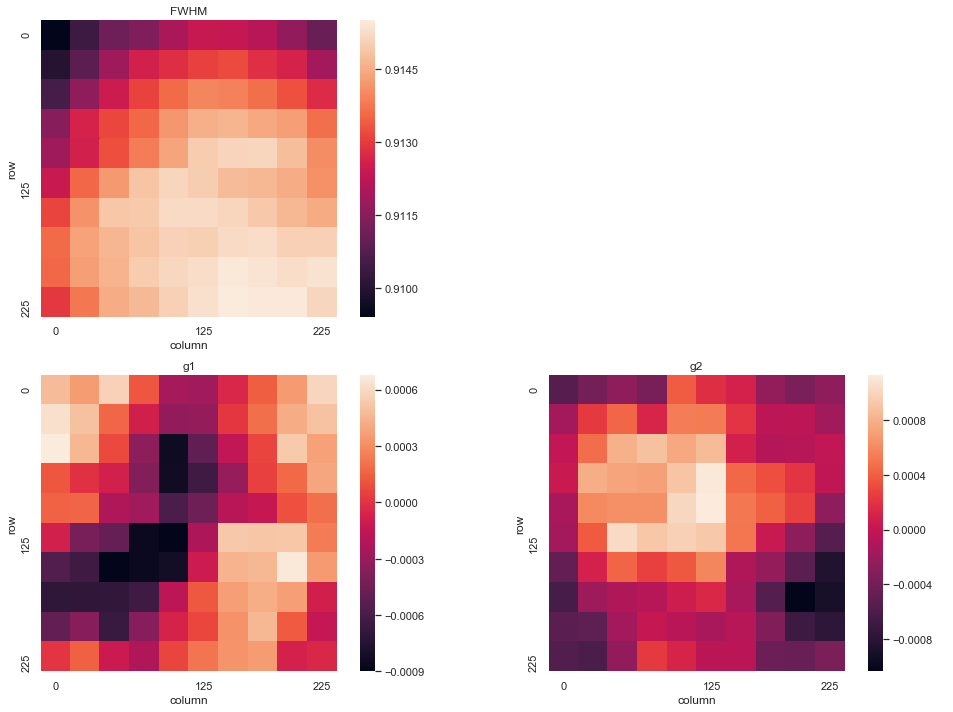

In [49]:
_plot_psf_variation(fwhm, g1, g2, n=n)